PROJECT DONE BY MAUZUM SHAMIL

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization,Conv2D,MaxPooling2D,Dropout
from keras.utils import to_categorical,plot_model
from PIL import Image
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [43]:
label_encoder = LabelEncoder()
label_encoder.fit(['cloudy','rainy','shine'])

LabelEncoder()

In [44]:
data = []
result = []
paths = []

for weather_folder in ['cloudy','rainy','shine']:
    class_index = label_encoder.transform([weather_folder])[0]
    class_result = to_categorical(class_index,num_classes=3)

    for r, d, f in os.walk(os.path.join(r"C:\Users\dell\Desktop\weather dataset",weather_folder)):
        for file in f:
            if file.lower().endswith(('.jpg','.jpeg')):
                paths.append(os.path.join(r,file))
    

    for path in paths:
        img = Image.open(path)
        img = img.resize((128,128))
        img =np.array(img)
        if img.shape==(128,128,3):
            data.append(img)
            result.append(class_result)


In [45]:
data = np.array(data)
data.shape

(1573, 128, 128, 3)

In [46]:
result = np.array(result)
result.shape

(1573, 3)

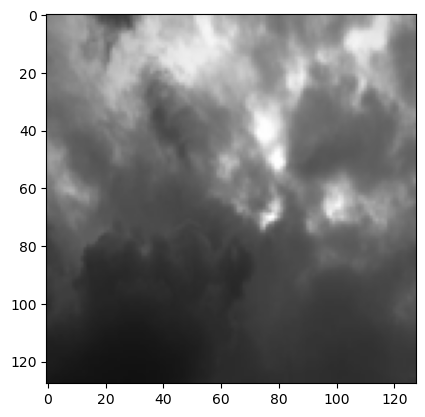

In [47]:
plt.imshow(data[0])

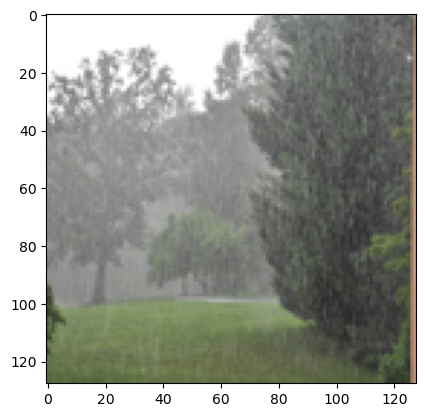

In [48]:
plt.imshow(data[800])

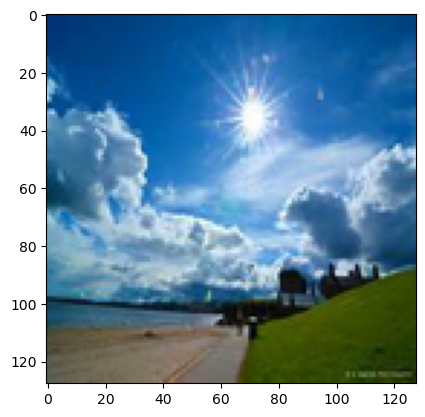

In [49]:
plt.imshow(data[1400])

# splitting

In [50]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

# model building resnet50

In [51]:
import numpy 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
input_shape = (128,128,3)
num_classes = 3

In [53]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


In [54]:
#base_model = ResNet50(weights='imagenet',include_top=False,input_shape=input_shape)

In [55]:
for layer in base_model.layers:
    layer.trainable = False

In [56]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(num_classes,activation='softmax')(x)
model = models.Model(inputs=base_model.input, outputs =predictions)

# model configurations

In [57]:
# data compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
# data augmentation

train_datagen = ImageDataGenerator(
    rescale =1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip =True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [59]:
#flow training images in batches
batch_size= 32
train_generator = train_datagen.flow(x_train,y_train,batch_size=batch_size)
test_generator = test_datagen.flow(x_test,y_test,batch_size=batch_size)

# model training

In [60]:
history  = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10


c:\Users\dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 615ms/step - accuracy: 0.4266 - loss: 1.1588 - val_accuracy: 0.4635 - val_loss: 1.0429
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 502ms/step - accuracy: 0.4612 - loss: 1.0565 - val_accuracy: 0.4603 - val_loss: 1.0417
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 504ms/step - accuracy: 0.4865 - loss: 1.0339 - val_accuracy: 0.4603 - val_loss: 1.0336
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 518ms/step - accuracy: 0.4475 - loss: 1.0480 - val_accuracy: 0.4603 - val_loss: 1.0371
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 594ms/step - accuracy: 0.4918 - loss: 1.0429 - val_accuracy: 0.4603 - val_loss: 1.0377
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 587ms/step - accuracy: 0.4964 - loss: 1.0216 - val_accuracy: 0.4603 - val_loss: 1.0470
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 591ms/step - accuracy: 0.4767 - loss: 1.0452 - val_accuracy: 0.4603 - val_loss: 1.0386
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 598ms/step - accuracy: 0.5052 - loss: 1.0133 - val_accuracy: 0.460

In [61]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 450ms/step - accuracy: 0.4429 - loss: 2.5650
Test accuracy: 0.4571428596973419


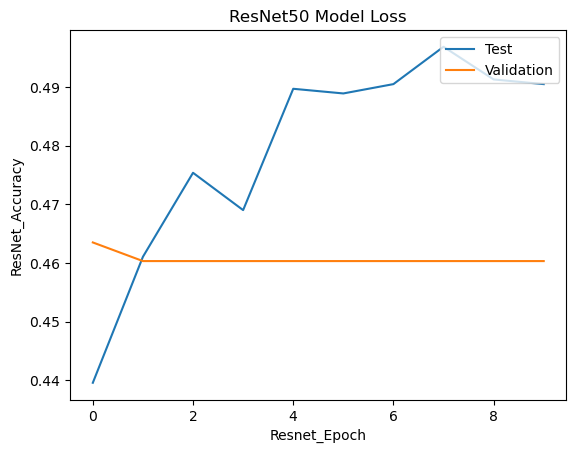

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 Model Loss')
plt.ylabel('ResNet_Accuracy')
plt.xlabel('Resnet_Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

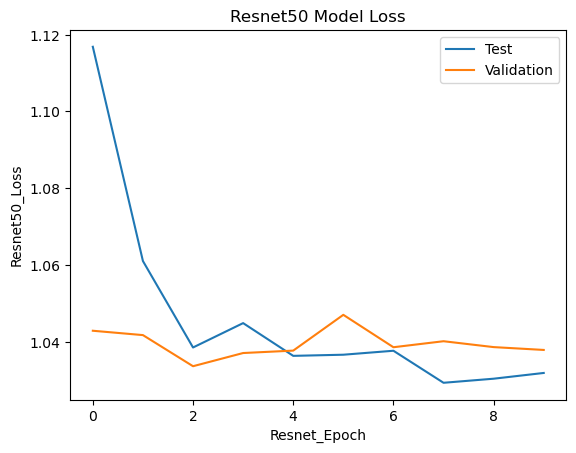

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Resnet50 Model Loss')
plt.ylabel('Resnet50_Loss')
plt.xlabel('Resnet_Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# model prediction

In [64]:
def names(number):
    if number==0:
        return 'its cloudy'
    elif number==1:
        return 'its rainy'
    else:
        return 'its shining'

its shining


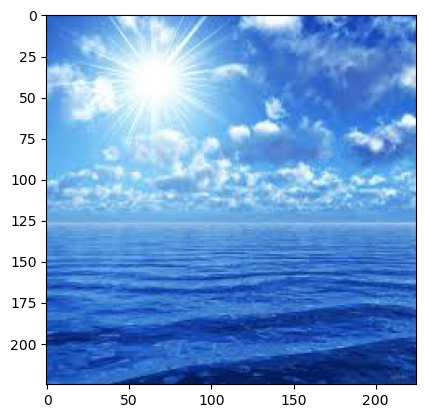

In [65]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\shine\shine22.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

its rainy


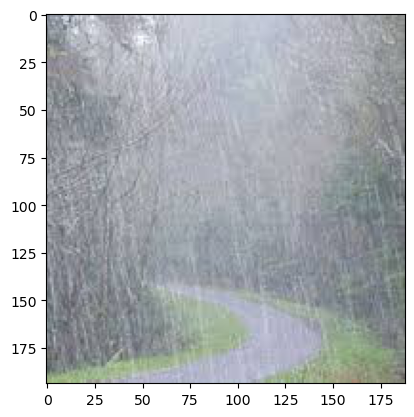

In [66]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\weather dataset\rainy\rain145.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))